In [5]:
#if silhoutte score is -` then poor clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df=df.dropna()


In [8]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


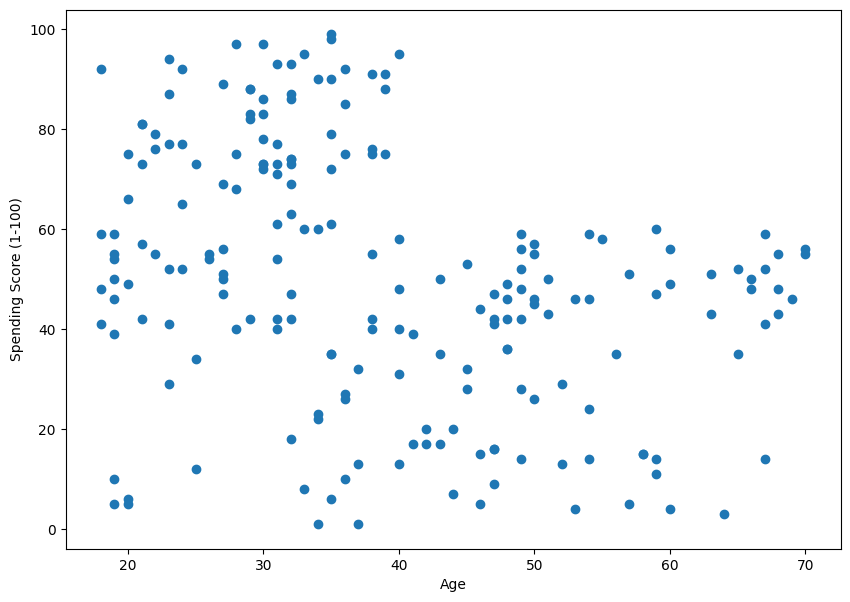

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


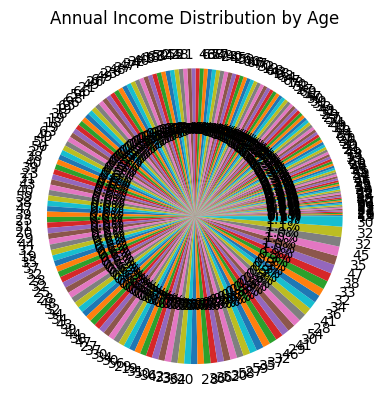

In [18]:
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame and 'Annual Income' is a column in it:
plt.pie(df['Annual Income (k$)'], labels=df['Age'], autopct='%1.1f%%')
plt.title('Annual Income Distribution by Age')
plt.show()


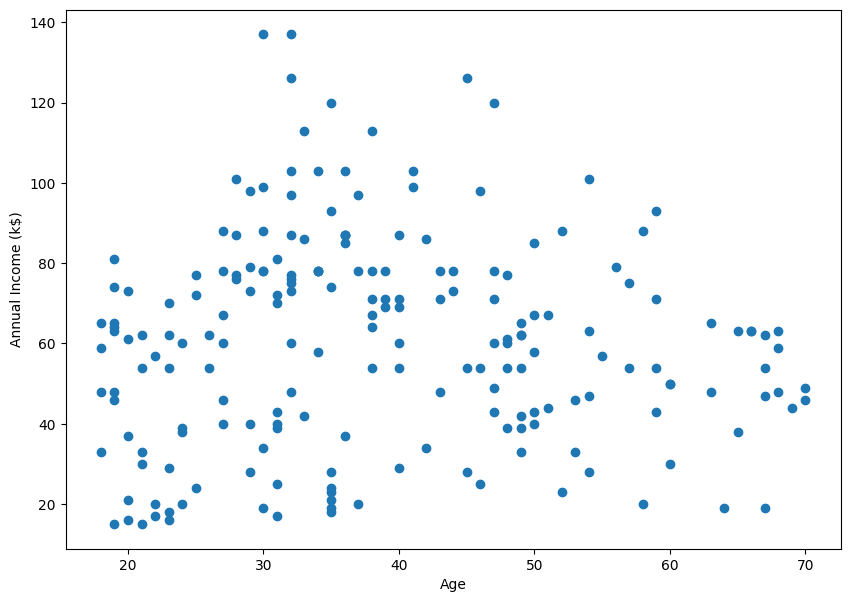

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(df['Age'],df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


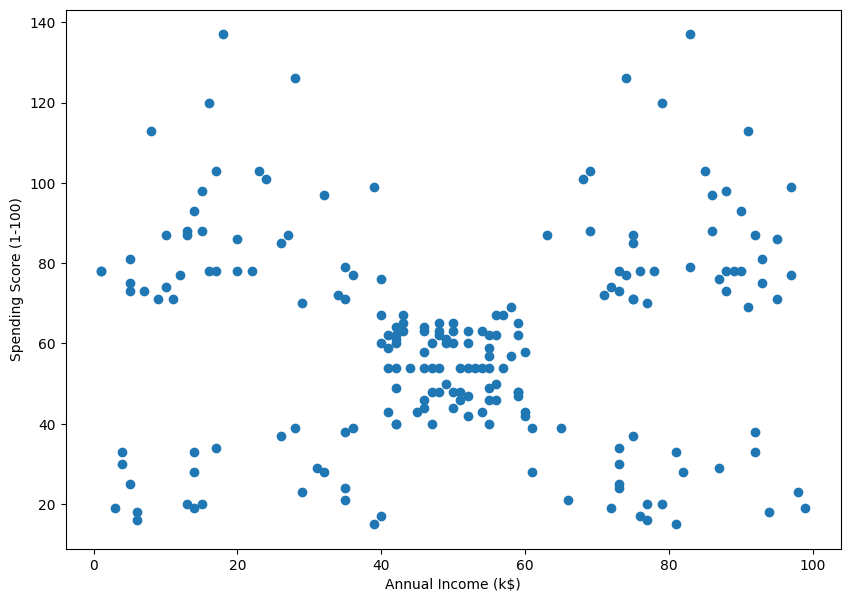

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


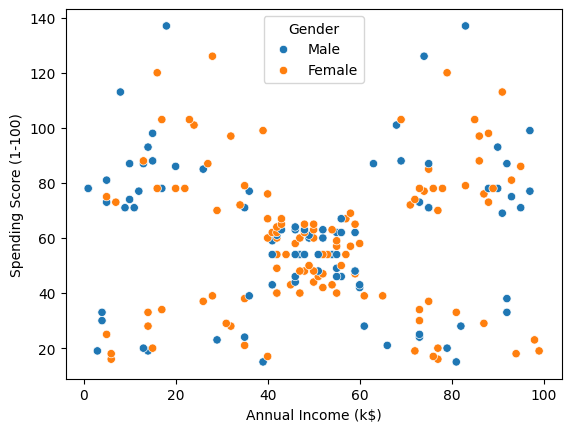

In [29]:
sns.scatterplot(x=df['Spending Score (1-100)'],y=df['Annual Income (k$)'],hue=df['Gender'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [39]:
#annual income and spending score are the 2 features are very important as sirf inhi k agraph makes up of clusters
relevant_cols = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
customer_df = df[relevant_cols]

In [40]:
customer_df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Kmeans is sensitive to the measurement units and scales of the data. It is better to standardize the data first to tackle this issue

The standardization substracts the mean of any feature from the actual values of that feature and divides the feature’s standard deviation.

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()

In [43]:
scaler.fit(customer_df)

StandardScaler()

In [44]:
scaled_data = scaler.transform(customer_df)

If you're using a StandardScaler, it scales each feature to have zero mean and unit variance.

If you're using a MinMaxScaler, it scales each feature to be in the range [0, 1].

In [45]:
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

### Determine the best number of cluster
A clustering model will not be relevant if we fail to identify the correct number of clusters to consider. Multiple techniques exist in the literature. We are going to consider the Elbow method, which is a heuristic method, and one of the widely used to find the optimal number of clusters.

In [46]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

'''measure of how tightly grouped the data points are within
 their clusters using elbow method. The inertia decreases
 as the number of clusters increases, but at some point,
  adding more clusters gives diminishing returns'''

In [48]:
from sklearn.cluster import KMeans
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

In [49]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

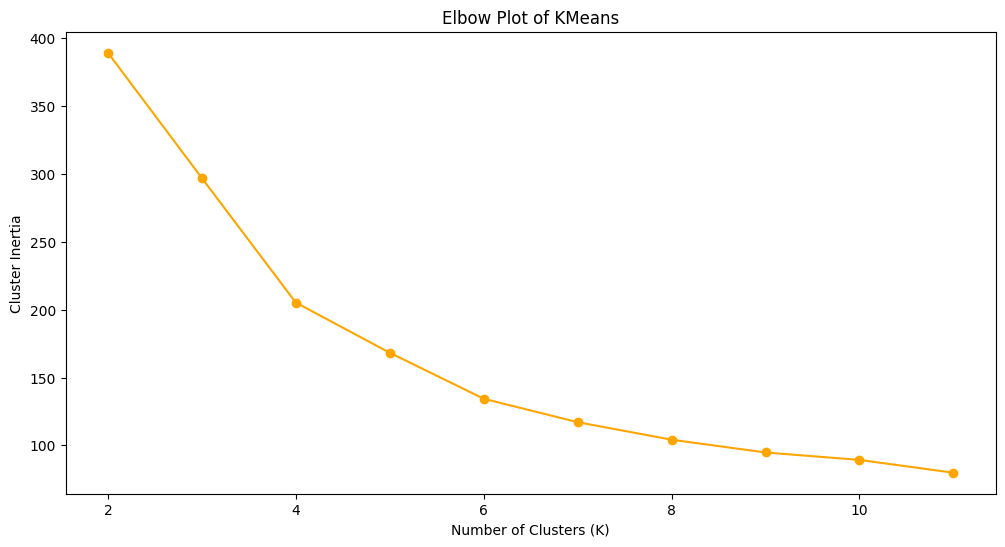

In [50]:
generate_elbow_plot(clusters_centers, k_values)


From the plot, we notice that the cluster inertia decreases as we increase the number of clusters. Also the drop the inertia is minimal after K=5 hence 5 can be considered as the optimal number of clusters.

### Create the final KMeans model

In [51]:
kmeans_model = KMeans(n_clusters = 5)

In [52]:
kmeans_model.fit(scaled_data)

KMeans(n_clusters=5)

In [53]:
### We can access the cluster to which each data point belongs by using the .labels_ attribute.

In [54]:
df["clusters"] = kmeans_model.labels_

In [55]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [56]:
### Visualize the clusters

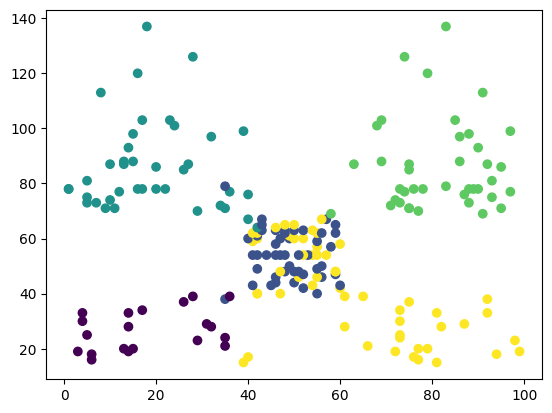

In [57]:
plt.scatter(df["Spending Score (1-100)"],
            df["Annual Income (k$)"],
            c = df["clusters"]
            )

The KMeans clustering seems to generate a pretty good result, and the five clusters are well separated from each other, even though there is a slight overlap between the purple and the yellow clusters.

- Customers on the top left have a low spending score and a high annual income. A good marketing strategy could be implemented to target those customers so that they can spend more.
- On the other hand, customers on the bottom left have a low annual income and also spends less, which makes sense, because they are trying to adjust their spending habit to their budget.
- The top right customers are similar to the bottom left, the difference is that they have enough budget to spend.
- Finally, the yellow group of customers spends beyond their budget.